In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf
import pandas_datareader.data as web
from datetime import datetime, timedelta
import seaborn as sns

%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.stattools import adfuller as adf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
# import pmdarima as pmd
from statsmodels.stats.diagnostic import acorr_ljungbox

import math

import arch as arch

C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
end = '2022-04-05'
df = yf.Ticker('ETH-USD').history(interval='1d',period='max')

In [3]:
ratio = int(0.7*len(df))

In [4]:
data = df[["Close"]].copy().dropna()
log_data = np.log(data)
diff_data = log_data.diff().dropna()

ratio = int(len(data)*0.93)

price_train = data[:ratio]
price_test = data[ratio:]

log_train = log_data[:ratio]
log_test = log_data[ratio:]

diff_train = diff_data[:ratio]
diff_test = diff_data[ratio:]

# # Data visualisation
   Original and log prices plots 

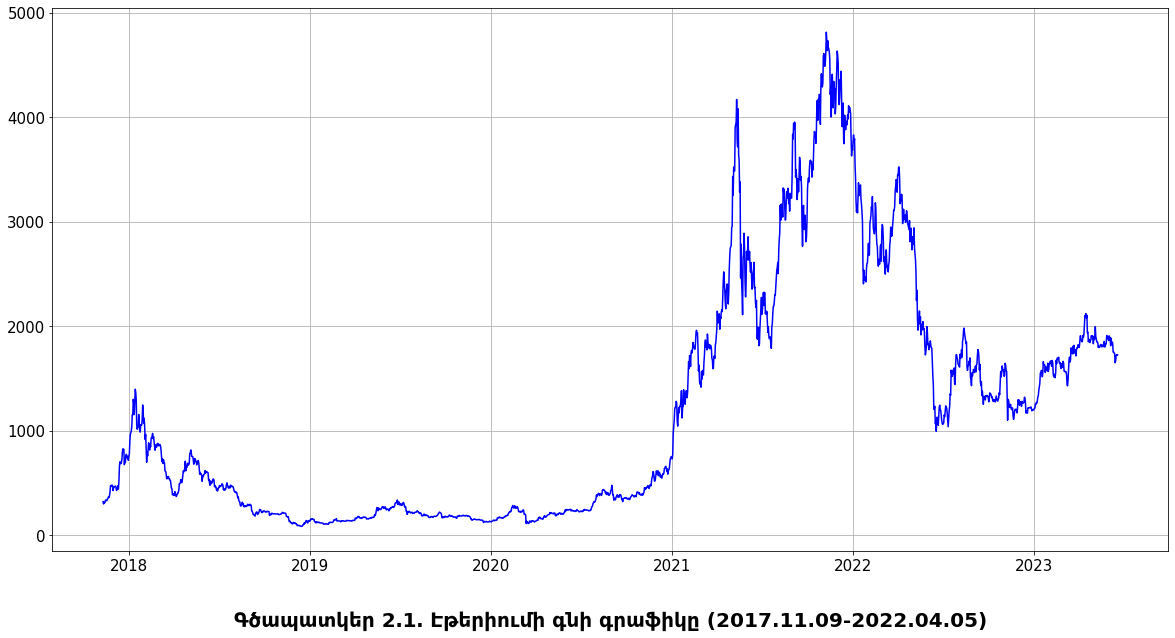

In [5]:
plt.figure(figsize = (20,10))

plt.plot(data, color = 'blue')
plt.title('Գծապատկեր 2․1․ Էթերիումի գնի գրաֆիկը (2017.11.09-2022.04.05)', y = -0.15, fontsize = 20, fontweight = 'bold')

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.grid(True)
plt.show()

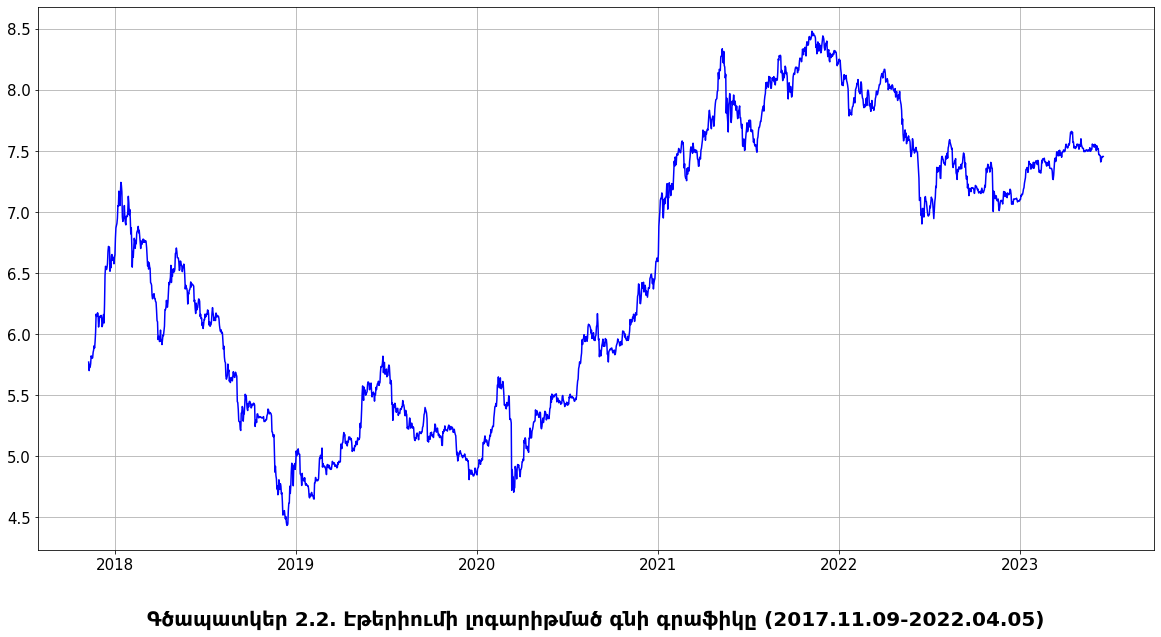

In [6]:
plt.figure(figsize = (20,10))

plt.plot(log_data, color = 'blue')
plt.title('Գծապատկեր 2․2․ Էթերիումի լոգարիթմած գնի գրաֆիկը (2017.11.09-2022.04.05)', y = -0.15, fontsize = 20, fontweight = 'bold')

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.grid(True)
plt.show()

######  log price times series pacf and acf# 

C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


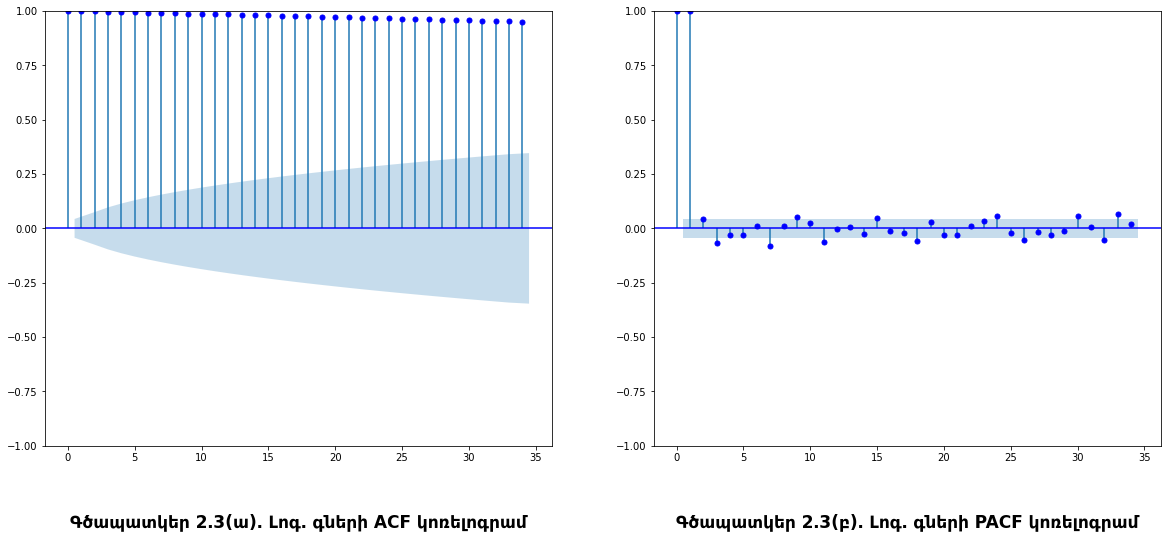

In [7]:
plt.fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))

plot_acf(log_data, ax1, color = 'blue')
ax1.set_title('Գծապատկեր 2․3(ա)․ Լոգ․ գների ACF կոռելոգրամ', y = -0.2, fontsize = 17, fontweight = 'bold')

plot_pacf(log_data, ax2, color = 'blue')
ax2.set_title('Գծապատկեր 2․3(բ)․ Լոգ․ գների PACF կոռելոգրամ', y = -0.2, fontsize = 17, fontweight = 'bold')

plt.show()

#### First difference

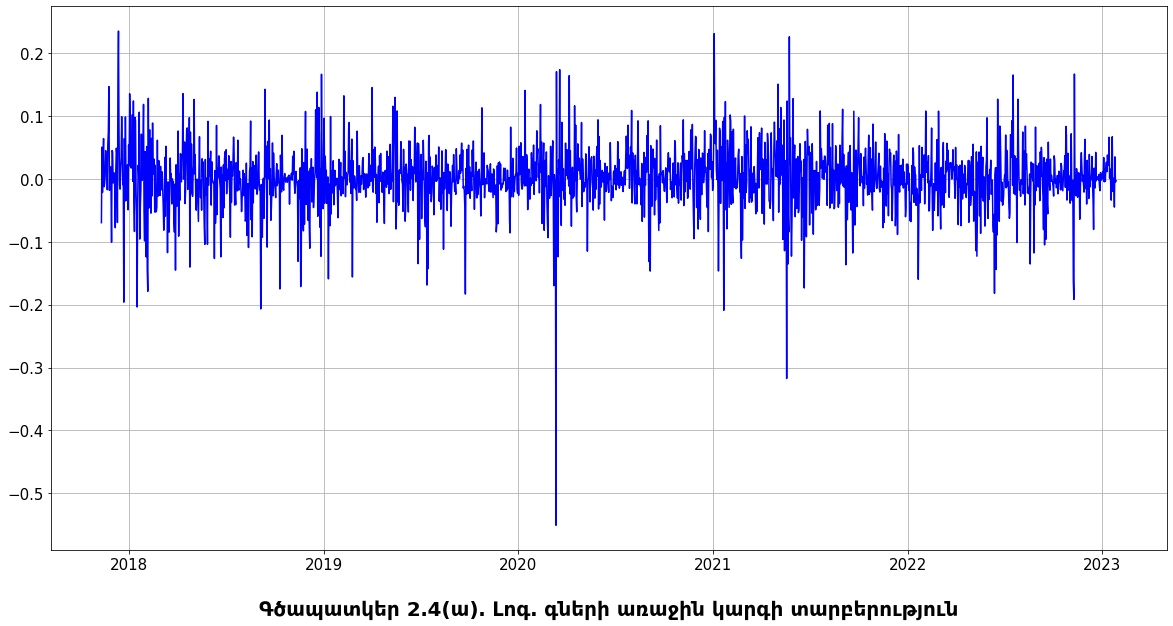

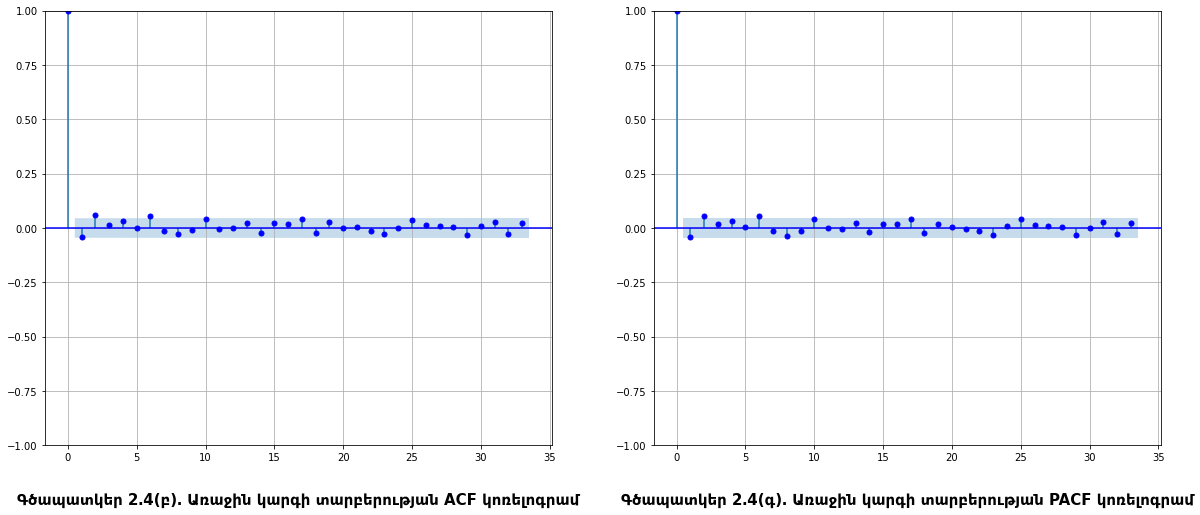

In [8]:
plt.figure(figsize = (20,10))

plt.plot(diff_train, color = 'blue')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('Գծապատկեր 2․4(ա)․ Լոգ․ գների առաջին կարգի տարբերություն', y = -0.13, fontsize = 20, fontweight = 'bold')
plt.grid(True)

plt.fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20,8))

plot_acf(diff_train,ax1, color = 'blue')
ax1.set_title('Գծապատկեր 2․4(բ)․ Առաջին կարգի տարբերության ACF կոռելոգրամ', y=-0.15, fontsize = 15, fontweight = 'bold')
ax1.grid(True)


plot_pacf(diff_train, ax2, color = 'blue')
ax2.set_title('Գծապատկեր 2․4(գ)․ Առաջին կարգի տարբերության PACF կոռելոգրամ', y = -0.15, fontsize = 15, fontweight = 'bold')
plt.grid(True)

plt.show()

### Adfuller test
The p-value, or probability value, tells you how likely it is that your data could have occurred under the null hypothesis. It does this by calculating the likelihood of your test statistic, which is the number calculated by a statistical test using your data. The p-value, or probability value, tells you how likely it is that your data could have occurred under the null hypothesis. It does this by calculating the likelihood of your test statistic, which is the number calculated by a statistical test using your data.

In [9]:
result_1 = adf(log_train, autolag = 'AIC')  
print('Results of Dickey-Fuller Test: ')
output = pd.Series(result_1[0:4], index = ['Test Statistic', 'p-value', 'Lags used', 'Number of Observetions used'])
for key, value in result_1[4].items():
    output['Critical value(%s)'%key] = value
    
# print(output)

Results of Dickey-Fuller Test: 


In [10]:
result_diff = adf(diff_train, autolag = 'AIC')
print('Resutls of Dickey-Fuller Test(diff): ')
output_diff = pd.Series(result_diff[0:4], index = ['Test Statistic', 'p-value', 'Lags used', 'Number of observations used'])
for key, value in result_diff[4].items():
    output_diff['Critical value(%s)' %key] = value

# print(output_diff)

Resutls of Dickey-Fuller Test(diff): 


# ARIMA model
ARIMA(2,1,2)

In [11]:
# model_1 = ARIMA(log_train, order = (2,1,2), freq = 'D')
# fitted_1 = model_1.fit()
# # fitted_1.summary()

# ARIMA(1,0,1)

In [12]:
model_1 = ARIMA(diff_data, order = (1,0,1), freq = 'D')
model_fitted = model_1.fit()



C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


#  Train test forecast

In [13]:
data_ = [x for x in diff_train.Close]
predictions = []
price_predictions = []
for t in range(len(log_test)):
    model = ARIMA(data_, order = (1,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_ = output[0]
    predictions.append(pred_)
    obs = log_test.Close[t]
    data_.append(obs)
#     for price in df:
#         price_pred =  df.iloc[(len(train) + t)]* math.exp(pred)
#         price_predictions.append(price_pred)
#   print(f'predicted: {predictions}, \n ecpected{obs}')

C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-sta

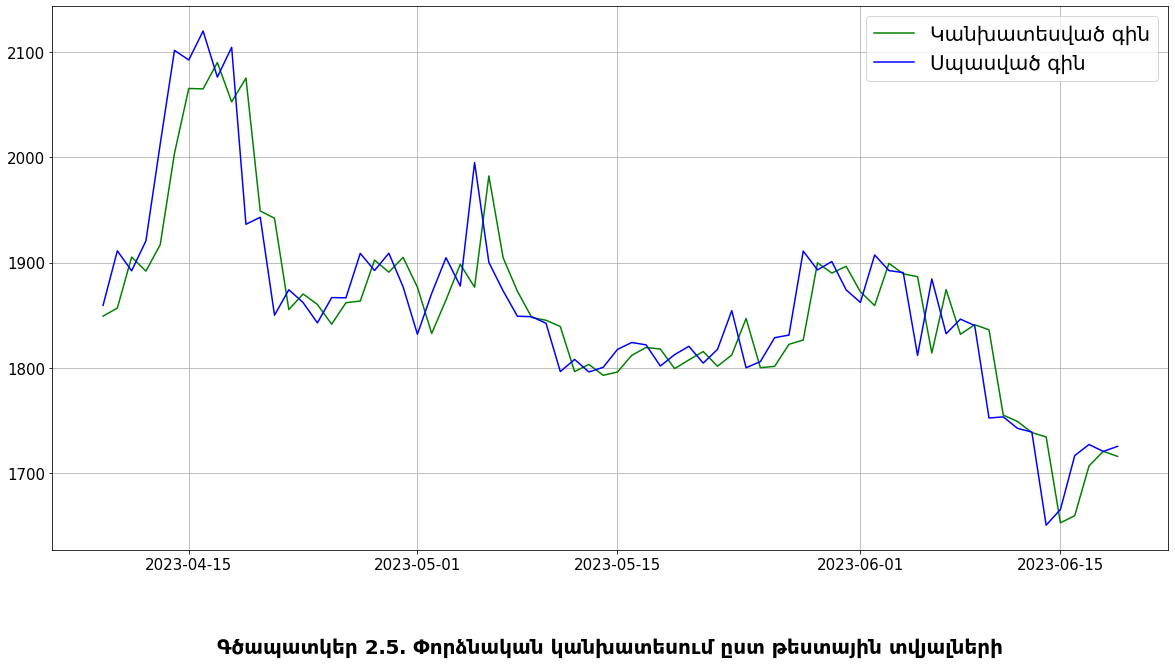

In [14]:
original_scale = pd.DataFrame( np.exp(predictions))
original_scale.index = log_test.index

plt.figure(figsize = (20,10))

ratio = int(len(log_test) * 0.5)
plt.plot(original_scale[ratio:], color = 'green', label = 'Կանխատեսված գին')
plt.plot(price_test[ratio:],color = 'blue', label = 'Սպասված գին')
plt.title('Գծապատկեր 2․5․ Փորձնական կանխատեսում ըստ թեստային տվյալների', y=-0.2, fontsize = 20, fontweight = 'bold')

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.legend(fontsize = 20, loc = 'best')
plt.grid(True)
plt.show()

# Whole data model

In [15]:
def display(time_series):
    plt.figure(figsize = (18,7))
    plt.plot(residuals, color = 'blue')
    plt.title('Գծապատկեր 2․6(ա)․ Մոդելի մնացորդը', y = -0.2, fontsize = 20, fontweight = 'bold')
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (17,10))
    
    plot_acf(residuals, ax1, color = 'blue')
    ax1.set_title('(ա)․ Մոդելի մնացորդների ACF կոռելոգրամ', y = -0.2, fontsize = 20, fontweight = 'bold')
    
    plot_pacf(residuals, ax2, color = 'blue')
    ax2.set_title('(բ)․ Մոդելի մնացորդների PACF կոռելոգրամ', y = -0.2, fontsize = 20, fontweight = 'bold')
    
    norplt = ax3.plot(p_vals, color = 'green', label = 'p-արժեք')
    ax3.axhline(y = 0.05, color = 'blue',  linestyle = '--')
    ax3.set_title('(գ)․ Լյունգ-Բոքս թեստի p-արժեքը', y = -0.2, fontsize = 20, fontweight = 'bold')
    plt.legend(loc = 'best')
    
    ax4.hist(residuals, density = True, bins = 40, color = 'blue');
    ax4.set_title('Մոդելի մնացորդների բաշխումը', y = -0.2, fontsize = 20, fontweight = 'bold' )
    
    


In [16]:
model_res = ARIMA(diff_data, order = (1,0,1), freq = "D")
model_resid = model_res.fit()


residuals = model_resid.resid


C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


# Ljung-box test
The Ljung-Box test is a statistical test that checks if autocorrelation exists in a time series.

It uses the following hypotheses:

H0: The residuals are independently distributed.

HA: The residuals are not independently distributed; they exhibit serial correlation.

Ideally, we would like to fail to reject the null hypothesis. That is, we would like to see the p-value of the test be greater than 0.05 because this means the residuals for our time series model are independent, which is often an assumption we make when creating a model.


In [17]:
vol = residuals**2
ljung_box = list(acorr_ljungbox(residuals, return_df = False, lags = 50 ))
p_vals = ljung_box[1]
# p_vals
# plt.plot(p_vals, color = 'green')
# plt.axhline(y = 0.05, color = 'blue', linestyle = '--')
# plt.show()

C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


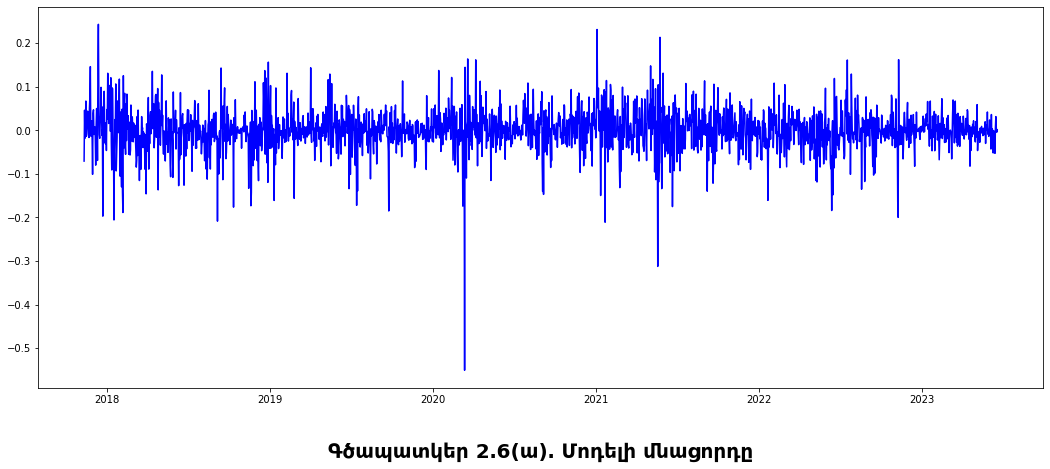

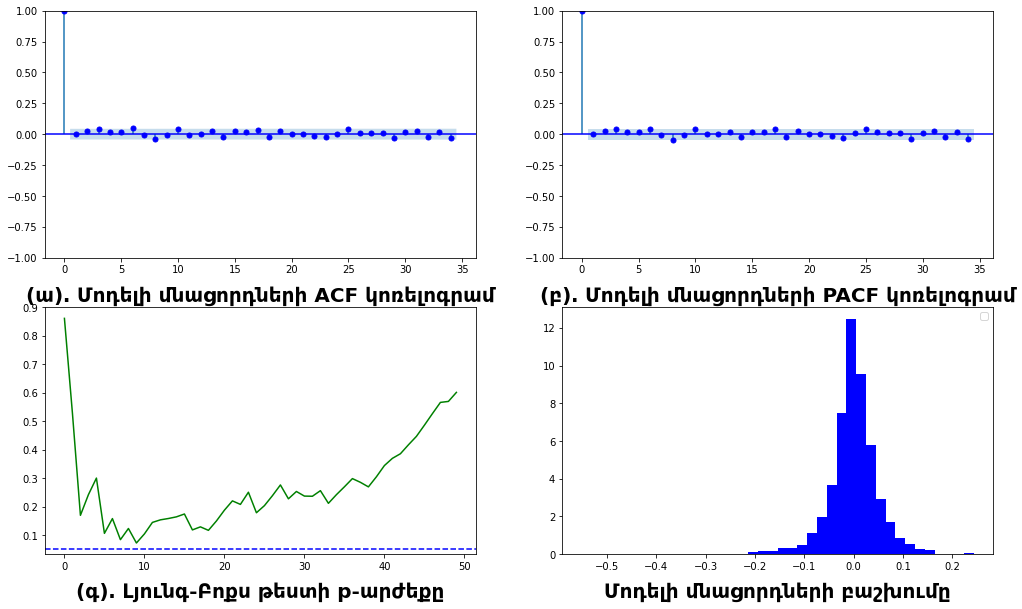

In [18]:
display(residuals)  
plt.legend(loc = 'best')# so we can see that rediduals of our model are not autocorreleted that is mean 
#we can use them to make a prediction

# 10-day-predictions using forecast() function
Every next value is included to the model

In [19]:
model_ = ARIMA(log_data[:-1], order = (1,1,1), freq = 'D')
model = model_.fit()

C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [20]:
index_future_dates = pd.date_range(start = '2017-11-10', end = '2022-04-15')
prediction_index = pd.date_range(start = '2022-04-05',end = '2022-04-15')

In [21]:
all_data = [x for x in diff_data.Close[:-1]]
final_predictions = []
for i in range(11):
    model_all = ARIMA(all_data, order = (1,0,1))
    fitted = model_all.fit()
    output = fitted.forecast()
    pred = output[0]
    final_predictions.append(pred)
    all_data.append(pred)


In [22]:
exp_predictions = np.exp(final_predictions)
list_exp_predictions = [x for x in exp_predictions]
list_price_all_data = [x for x in data.Close]
final_price_predictions = []

for i in range(len(exp_predictions)):
    price_pred = list_price_all_data[(len(list_price_all_data) - 1)] + exp_predictions[i]
    list_price_all_data.append(price_pred)
    final_price_predictions.append(price_pred)

In [23]:
len(prediction_index)

11

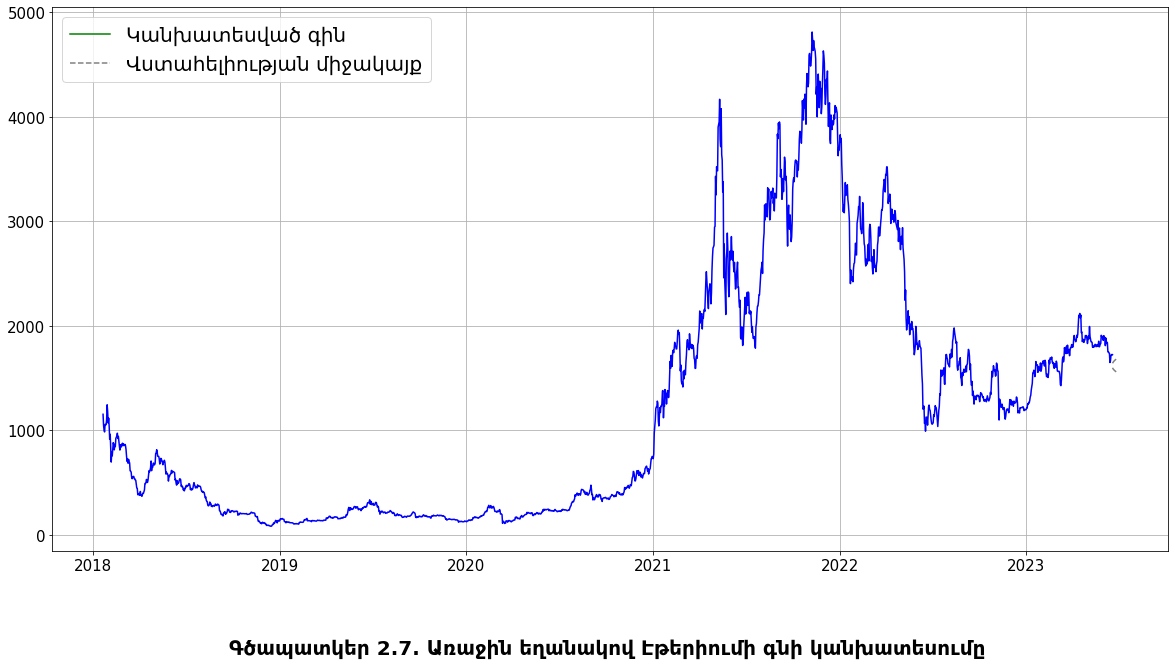

In [24]:
df_final_predictions = pd.DataFrame(final_price_predictions)
df_final_predictions.index = prediction_index

arima_forecast = model.get_forecast(11)
arima_predictions_df = np.exp(arima_forecast.conf_int(alpha = 0.8))
arima_predictions_df  = arima_predictions_df - 100
arima_predictions_df['Predictions'] = df_final_predictions

plt.figure(figsize = (20,10))

plt.plot(data[ratio:], color = 'blue')
plt.plot(arima_predictions_df['Predictions'], color = 'green', label = 'Կանխատեսված գին')
plt.plot(arima_predictions_df['lower Close'], color = 'grey',linestyle = '--', label = 'Վստահելիության միջակայք')
plt.plot(arima_predictions_df['upper Close'], color = 'grey', linestyle = '--')
plt.title('Գծապատկեր 2.7. Առաջին եղանակով Էթերիումի գնի կանխատեսումը ', y = -0.2, fontsize = 20, fontweight = 'bold')


plt.grid(True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc = 'best', fontsize = 20)
plt.show()

# Աղյուսակ 2,4

In [25]:
# arima_predictions_df

In [26]:
# df_final_predictions = pd.DataFrame(final_price_predictions)
# df_final_predictions.index = prediction_index

# plt.figure(figsize = (20,10))

# arima_forecast = model.get_forecast(10)
# arima_predictions_df = arima_forecast.conf_int(alpha = 0.8)
# arima_predictions_df["Predictions"] = df_final_predictions

# final_pred = np.exp(arima_predictions_df)
# ratio = int(len(df)*0.9)
# plt.plot(df[ratio:], color = 'blue')
# plt.plot(final_pred["Predictions"], color = "green", label = "Predictions")
# plt.plot(final_pred["upper Close"][prediction_index], color = "gray", linestyle = "--", label = "Conidence Levels(95%)")
# plt.plot(final_pred["lower Close"][prediction_index], color = "gray", linestyle = "--")

# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.show()

#  10-day-ahead predictions using predict() function
Every new predicted value is included to the model


In [27]:
all_data_ = [x for x in diff_data.Close[:-1]]
pred_ictions = []
for i in range(11):
    model_all = ARIMA(all_data_, order = (1,0,1))
    fitted = model_all.fit()
    output = fitted.predict()
    pred = output[0]
    pred_ictions.append(pred)
    all_data.append(pred)


In [28]:
pred_exp_predictions = np.exp(pred_ictions)
pred_exp_predictions_list = [x for x in pred_exp_predictions]
pred_list_all_data = [x for x in data.Close]
pred_final_price_predictions = []

for i in range(len(pred_exp_predictions)):
    price_pred_ictions = pred_list_all_data[len(pred_list_all_data) - 1] * pred_exp_predictions_list[i]
    pred_list_all_data.append(price_pred_ictions)
    pred_final_price_predictions.append(price_pred_ictions)

In [29]:
df_pred_final_price_predictions = pd.DataFrame(pred_final_price_predictions)
df_pred_final_price_predictions.index = prediction_index

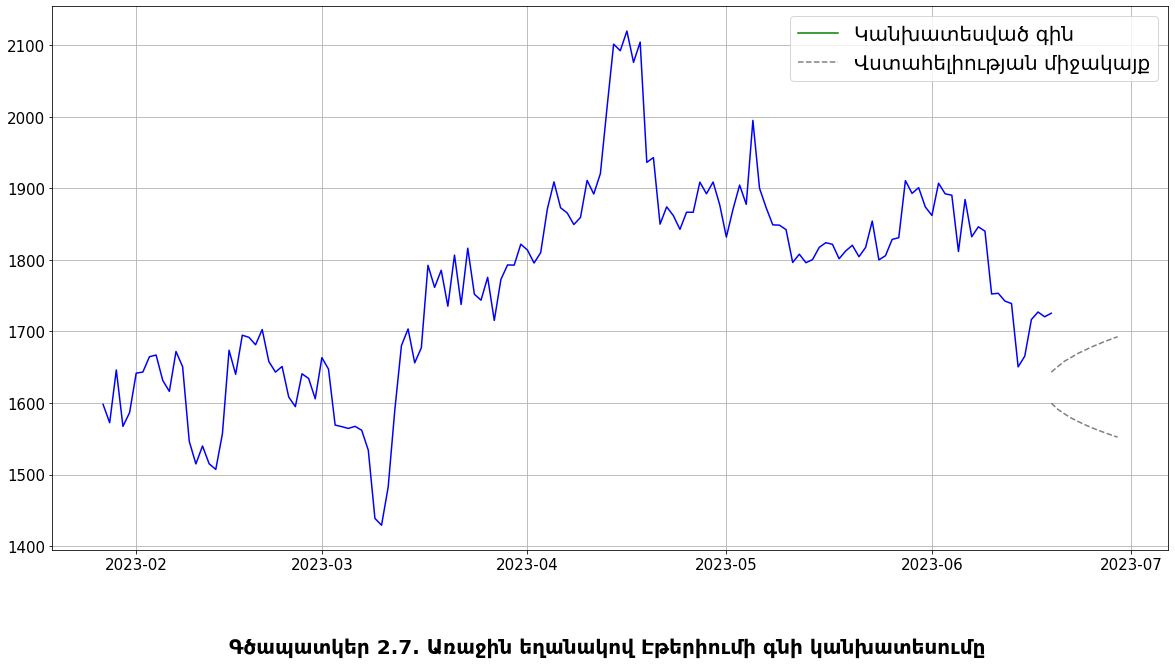

In [30]:
ratio = int(len(data)*0.93)

arima_forecast_pred = model.get_forecast(11)
arima_predictions_df = np.exp(arima_forecast.conf_int(alpha = 0.8))
arima_predictions_df  = arima_predictions_df - 100
arima_predictions_df['Predictions'] = df_final_predictions

plt.figure(figsize = (20,10))

plt.plot(data[ratio:], color = 'blue')
plt.plot(arima_predictions_df['Predictions'], color = 'green', label = 'Կանխատեսված գին')
plt.plot(arima_predictions_df['lower Close'], color = 'grey',linestyle = '--', label = 'Վստահելիության միջակայք')
plt.plot(arima_predictions_df['upper Close'], color = 'grey', linestyle = '--')
plt.title('Գծապատկեր 2.7. Առաջին եղանակով Էթերիումի գնի կանխատեսումը ', y = -0.2, fontsize = 20, fontweight = 'bold')


plt.grid(True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc = 'best', fontsize = 20)
plt.show()

# 10-day-ahead forecast using forecast(10) function 
New predicted value is not included to the model

In [31]:
model_for_10 = ((ARIMA(log_data, order = (1,1,1), freq = 'D').fit()))
model_10_forecast = np.exp(model_for_10.forecast(11))

C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


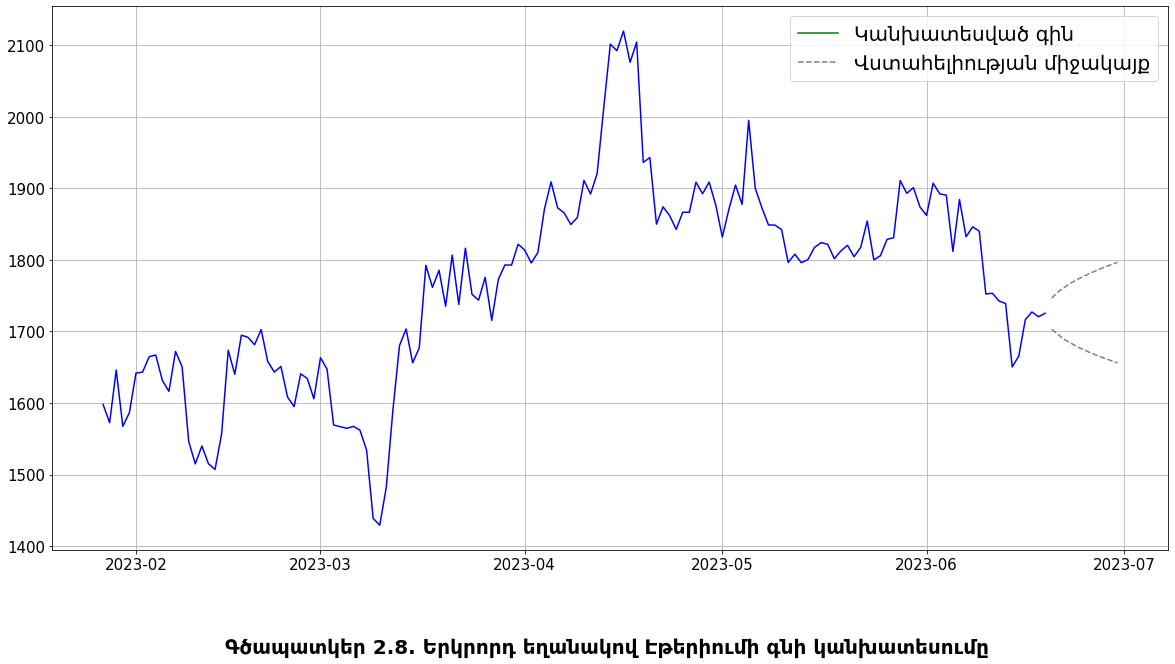

In [32]:
ratio = int(len(data)*0.93)
model_10_forecast_df = pd.DataFrame(model_10_forecast)
model_10_forecast_df.index = prediction_index

model_10_predictions = model_for_10.get_forecast(11)
model_10_predictions_df = np.exp(model_10_predictions.conf_int(alpha = 0.8)) 
model_10_predictions_df['Predictions'] = model_10_forecast_df 

plt.figure(figsize = (20,10))

plt.plot(data[ratio:], color = 'blue')
plt.plot(model_10_predictions_df['Predictions'], color = 'green', label = 'Կանխատեսված գին')
plt.plot(model_10_predictions_df['lower Close'], linestyle = '--', color = 'grey', label = 'Վստահելիության միջակայք')
plt.plot(model_10_predictions_df['upper Close'], linestyle = '--', color = 'grey')
plt.title('Գծապատկեր 2.8. Երկրորդ եղանակով Էթերիումի գնի կանխատեսումը ', y = -0.2, fontsize = 20, fontweight = 'bold')

# plt.plot(df_pred_final_price_predictions)

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid(True)
plt.legend(loc = 'best', fontsize = 20)
plt.show()

#  ##

In [33]:
# all_ = [x for x in log_data.Close[:-1]]
# pred_ictions_all = []
# all_get_forecats = []
# conf_int = []
# for i in range(11):
#     model_all_ = ARIMA(all_, order = (1,1,1))
#     fitted_all = model_all_.fit()
#     output_ = fitted_all.predict()
#     pred__ = output_[0]
#     pred_ictions_all.append(pred_)
#     all_.append(pred__)
#     all_get_for = fitted_all.get_forecast(1)
#     all_get_for_df = all_get_for.conf_int(alpha = 0.8)
#     conf_int.append(all_get_for_df)

In [34]:
 arima_predictions_df - model_10_predictions_df

,lower Close,upper Close,Predictions
2023-06-19 00:00:00+00:00,NaN,NaN,NaN
2023-06-20 00:00:00+00:00,-112.074806,-95.536266,NaN
2023-06-21 00:00:00+00:00,-110.741792,-97.122304,NaN
2023-06-22 00:00:00+00:00,-109.276406,-98.399035,NaN
2023-06-23 00:00:00+00:00,-108.873404,-98.944175,NaN
2023-06-24 00:00:00+00:00,-108.201174,-99.510775,NaN
2023-06-25 00:00:00+00:00,-107.963987,-99.827900,NaN
2023-06-26 00:00:00+00:00,-107.577464,-100.155370,NaN
2023-06-27 00:00:00+00:00,-107.403172,-100.374711,NaN
2023-06-28 00:00:00+00:00,-107.152795,-100.592165,NaN


# New data

In [35]:
# ratio_ = int(len(data)*0.99)

# compare_data = web.DataReader('ETH-USD', 'yahoo', start = '2022-04-05',end = '2022-04-16')[['Close']].dropna()
# model_10_forecast_df = pd.DataFrame(model_10_forecast)
# model_10_forecast_df.index = prediction_index

# model_10_predictions = model_for_10.get_forecast(11)
# model_10_predictions_df = np.exp(model_10_predictions.conf_int(alpha = 0.8)) 
# model_10_predictions_df['Predictions'] = model_10_forecast_df 

# plt.figure(figsize = (20,10))

# plt.plot(data[ratio_:], color = 'blue')
# plt.plot(compare_data, color = 'red', label = 'Իրական գին')
# plt.plot(model_10_predictions_df['Predictions'], color = 'orange', label = 'Երկրորդ եղանակ')
# plt.plot(arima_predictions_df['Predictions'], color = 'green', label = 'Առաջին եղանակ')
# plt.title('Գծապատկեր 2.8. Երկրորդ եղանակով Էթերիումի գնի կանխատեսումը ', y = -0.2, fontsize = 20, fontweight = 'bold')

# # plt.plot(df_pred_final_price_predictions)

# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.grid(True)
# plt.legend(loc = 'best', fontsize = 20)
# plt.show()

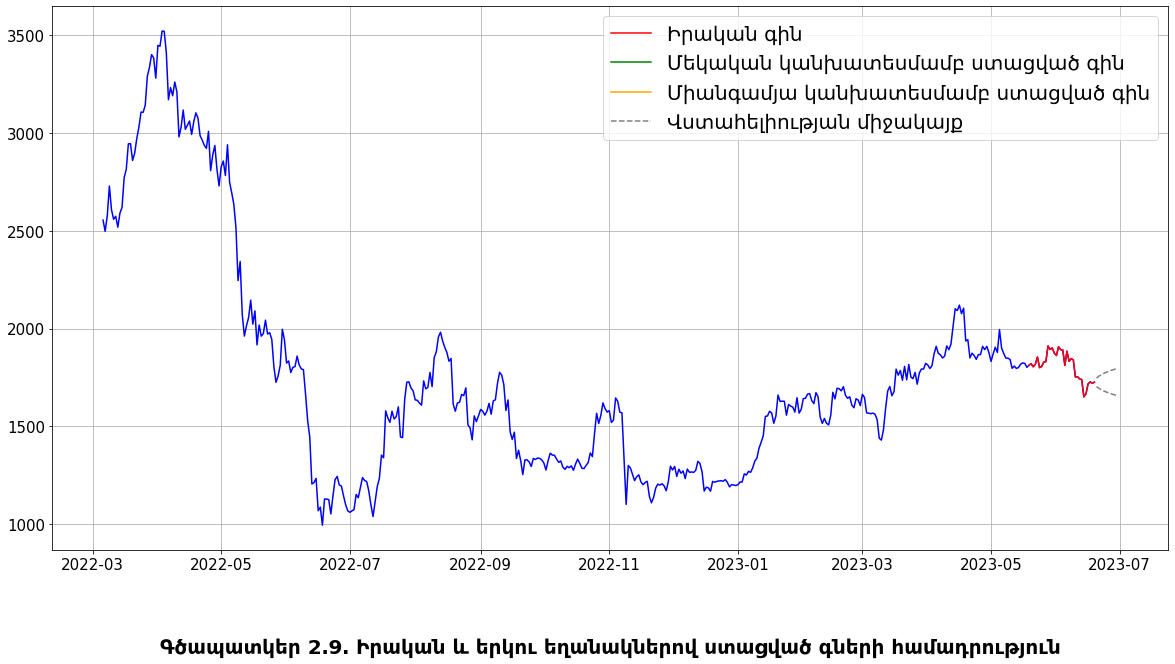

In [36]:
ratio__ = int(len(df*0.98))
plt.figure(figsize = (20,10))


new_data = yf.Ticker('ETH-USD').history(interval='1d')[['Close']].dropna()

plt.plot(data['2022-03-06':], color = 'blue')
plt.plot(new_data, color = 'red', label = 'Իրական գին')
plt.plot(model_10_predictions_df['Predictions'], color = 'green', label = 'Մեկական կանխատեսմամբ ստացված գին')
plt.plot(arima_predictions_df['Predictions'], color = 'orange', label = 'Միանգամյա կանխատեսմամբ ստացված գին')

plt.plot(model_10_predictions_df['lower Close'], linestyle = '--', color = 'grey', label = 'Վստահելիության միջակայք')
plt.plot(model_10_predictions_df['upper Close'], linestyle = '--', color = 'grey')

plt.title('Գծապատկեր 2․9․ Իրական և երկու եղանակներով ստացված գների համադրություն',  y = -0.2, fontsize = 20, fontweight = 'bold')

plt.xticks(size = 15)
plt.yticks(size = 15)

plt.grid(True)
plt.legend(fontsize = 20)
plt.show()